In [2]:
!pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00


In [3]:
!pip install python-multipart

In [4]:
%%writefile app.py
from fastapi import FastAPI, UploadFile, File
import torch
from torchvision import transforms
from PIL import Image
import io
import sys
sys.path.append("/content/Brain-Tumor-Images-Classification")  # Adjust the path
from SWIN import model
import torch.optim as optim
import timm

Writing app.py


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# %% [code]
%run /content/Brain-Tumor-Images-Classification/Utils/Save_Load__Model.ipynb

In [25]:
!jupyter nbconvert --to script ./Brain-Tumor-Images-Classification/SWIN.ipynb

[NbConvertApp] Converting notebook ./Brain-Tumor-Images-Classification/SWIN.ipynb to script
[NbConvertApp] Writing 4549 bytes to Brain-Tumor-Images-Classification/SWIN.txt


In [32]:
cd Brain-Tumor-Images-Classification

/content/Brain-Tumor-Images-Classification


In [33]:
!mv SWIN.txt SWIN.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

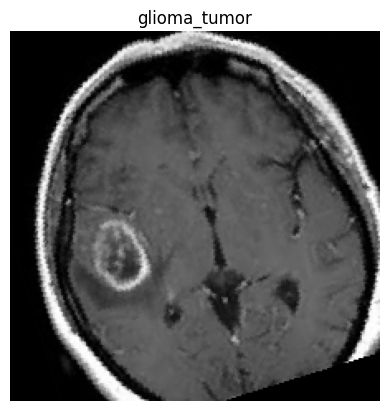

In [8]:
# %% [code]
%run /content/Brain-Tumor-Images-Classification/Data-Preprocessing/Brain_tumor_data_preprocessing.ipynb

In [9]:
import timm
# Recreate the model as defined in the training phase
model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=len(dataset.classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (layers): Sequential(
    (0): SwinTransformerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=96, out_features=384, bias=True)
            (act): GELU(approximate='none')
            (drop1): 

In [10]:
model, epoch = load_checkpoint('/content/drive/My Drive/swin_brain_tumor_checkpoint.pth')

<ipython-input-6-4097746acb87>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


Checkpoint loaded from /content/drive/My Drive/swin_brain_tumor_checkpoint.pth
Resumed from epoch 20, loss: 0.6270419644457953


In [11]:
model.eval()

SwinTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
    (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
  )
  (layers): Sequential(
    (0): SwinTransformerStage(
      (downsample): Identity()
      (blocks): Sequential(
        (0): SwinTransformerBlock(
          (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (attn): WindowAttention(
            (qkv): Linear(in_features=96, out_features=288, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=96, out_features=96, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
            (softmax): Softmax(dim=-1)
          )
          (drop_path1): Identity()
          (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=96, out_features=384, bias=True)
            (act): GELU(approximate='none')
            (drop1): 

In [12]:
from fastapi import FastAPI

# Define FastAPI app
app = FastAPI()

In [13]:
from fastapi import FastAPI, File, UploadFile

# Define prediction route
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    image = Image.open(io.BytesIO(await file.read())).convert("RGB")
    image = transform(image).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = model(image)
        prediction = torch.argmax(output, dim=1).item()

    return {"prediction": prediction}

In [40]:
import os
print(os.getcwd())


/content/Brain-Tumor-Images-Classification


In [41]:
cd ..

/content


In [42]:
!uvicorn app:app --host 0.0.0.0 --port 8000 &  # Start FastAPI server

Traceback (most recent call last):
  File "/usr/local/bin/uvicorn", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1161, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1082, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1443, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 788, in invoke
    return __callback(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 412, in main
    run(
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.

In [46]:
!ps aux | grep uvicorn

root       10308  0.0  0.0   6484  2332 ?        S    10:02   0:00 grep uvicorn


**Run FastAPI**

In [43]:
!pip install pyngrok
from pyngrok import ngrok

# Authenticate with ngrok (make sure to replace with your actual ngrok token)
ngrok.set_auth_token("Key")

# Create a tunnel to the FastAPI server
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

Public URL: NgrokTunnel: "https://6d90-34-125-124-202.ngrok-free.app" -> "http://localhost:8000"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Training images: 2212, Validation images: 632


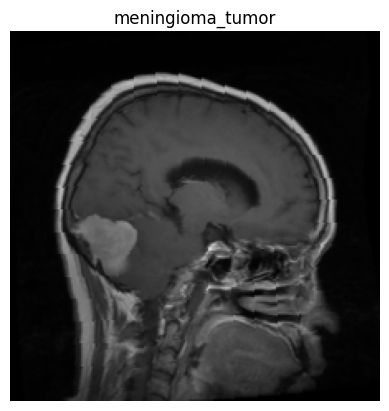

FileNotFoundError: [Errno 2] No such file or directory: '/content/Brain-Tumor-Images-Classification/Data-Preprocessing/Save_Load__Model.ipynb'

In [38]:
import SWIN
!uvicorn app:app --host 0.0.0.0 --port 8000 &  # Start FastAPI server
from pyngrok import ngrok
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

 **Test FastAPI**

In [ ]:
import requests

url = "http://your-public-ngrok-url/predict/"
files = {'file': open("brain_tumor_image.jpg", "rb")}
response = requests.post(url, files=files)

print(response.json())